In [8]:
# I install all libraries before import using pip
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import yfinance as yf

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


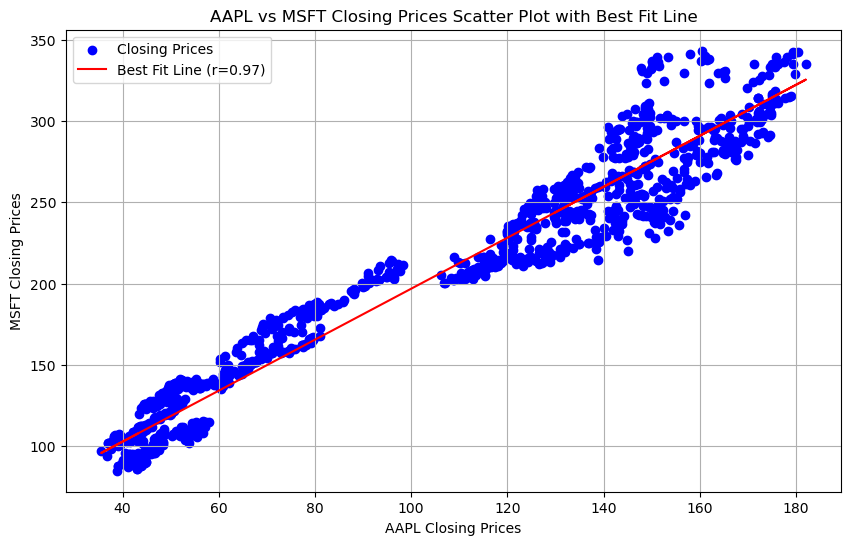

Linear Correlation (r): 0.97
Positive correlation: As AAPL closing prices increase, MSFT closing prices tend to increase.


In [7]:
# Step 2: Download historical daily closing price data
def download_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

yf.pdr_override()

# Define start and end date here
start_date = "2018-01-01"
end_date = "2023-01-01"

# Download historical stock data for AAPL and MSFT
aapl_data = download_stock_data("AAPL", start_date, end_date)
msft_data = download_stock_data("MSFT", start_date, end_date)

# Step 3: Create a scatter plot with a best fit line
plt.figure(figsize=(10, 6))

plt.scatter(aapl_data['Close'], msft_data['Close'], label='Closing Prices', color='blue')

slope, intercept, r_value, p_value, std_err = stats.linregress(aapl_data['Close'], msft_data['Close'])
line = slope * aapl_data['Close'] + intercept

plt.plot(aapl_data['Close'], line, label=f'Best Fit Line (r={r_value:.2f})', color='red')

plt.title('AAPL vs MSFT Closing Prices Scatter Plot with Best Fit Line')
plt.xlabel('AAPL Closing Prices')
plt.ylabel('MSFT Closing Prices')
plt.legend()
plt.grid(True)
plt.show()

# Step 4: Discuss the linear correlation
print(f"Linear Correlation (r): {r_value:.2f}")
if r_value > 0:
    print("Positive correlation: As AAPL closing prices increase, MSFT closing prices tend to increase.")
elif r_value < 0:
    print("Negative correlation: As AAPL closing prices increase, MSFT closing prices tend to decrease.")
else:
    print("No linear correlation between AAPL and MSFT closing prices.")